# Computer Vision: Assignment 1 ( Image Filtering )

An image filtering is a technique through which size, colors, shading and other characteristics of an image are altered. An image filter is used to transform the image using different graphical editing techniques. Image filters are usually done through graphic design and editing software.

Image filtering is useful for many applications, including smoothing, sharpening, removing noise, and edge detection. A filter is defined by a kernel, which is a small array applied to each pixel and its neighbors within an image. In most applications, the center of the kernel is aligned with the current pixel, and is a square with an odd number (3, 5, 7, etc.) of elements in each dimension. The process used to apply filters to an image is known as convolution, and may be applied in either the spatial or frequency domain.

## Requirements

- Python3
- OpenCV
- Numpy
- Matplotlib

## Importing required Libraries

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

## Load image from drive and shows the original image.

### **imshow**: 
Function that handles both rgb and grayscale image and shows them accordingly.

*Parameters*: 
- **img**: input img

*Return*: None

(512, 512, 1)


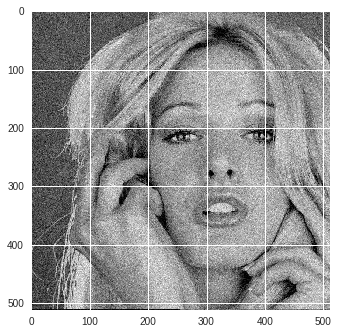

In [32]:

img = mpimg.imread("original.jpg")

def imshow(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap="gray")
    elif img.shape[2] == 1:
        plt.imshow(np.resize(img,(img.shape[0],img.shape[1])), cmap="gray")
    else:
        plt.imshow(img)


if len(img.shape) < 3:
    img.resize(*img.shape,1)

imshow(img)

print(img.shape)

## Gamma Correction

### gammaCorrection

Function that apply gamma correction to input image

*Parameters*:

- **img**(2d/3d matrix): input image
- **gamma**(double): gamma contant

*Return*: 
- Gamma Corrected image

True

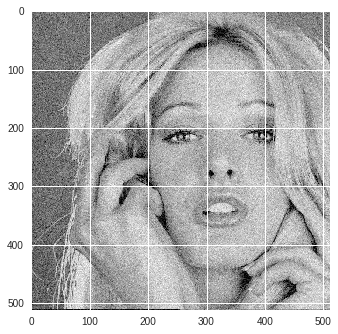

In [33]:
# Gamma Coorection
def gammaCorrection(img, gamma):
    out = np.power(img.copy(), gamma)
    return out.astype(np.uint8)

imshow(gammaCorrection(img,0.7))


cv2.imwrite("gamma.jpg",img)

## Low Pass, High Pass and Gaussian Filter

### gfunc:

Implementation of gaussian function

*Parameters*:

- **x, y and sigma**(double): gaussian function parameters

*Return*: 

- Scaler value at x,y for sigma of gaussian function

### gaussFilter:
Function that applies gaussian filter to an image

*Parameters*:
- **size**(tuple): size of gaussian filter
-  **sigma**(double): parameter of gaussian function

*Return*:

- Gaussian Filter(2d matrix)

In [34]:

# low pass filter
(lpfw,lpfh) = (3,3)
lowPassFilter = np.ones((lpfw,lpfh))*1/(lpfw*lpfh)


# high pass filter
(hpfw,hpfh) = (3,3)
highPassFilter = -1*np.ones((hpfw,hpfh))
highPassFilter[hpfw//2,hpfh//2] = -np.sum(highPassFilter)-1


# gaussian filter
def gfunc(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*(sigma**2))))/(2*3.14*(sigma**2))

def gaussFilter(size, sigma):
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = gfunc(i-size[0]//2,j-size[1]//2, sigma )
    return out/np.sum(out)

(gfw,gfh) = (3,3)
gaussianFilter = gaussFilter((gfw,gfh),1)

print("Low Pass Filter")
print(lowPassFilter)

print("High Pass Filter")
print(highPassFilter)

print("Gaussian Filter")
print(gaussianFilter)

Low Pass Filter
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
High Pass Filter
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
Gaussian Filter
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


## Example of Low Pass and Gaussian Filter

### conv
Function that applies convolution to an 2d/3d matrix or numpy array on the given filter

*Parameters*:

- **image** (2d/3d matrix): image on which convolution will be applied with given filter
- **filter** (2d matrix): filter which will applied to image

*Return*:

- filtered image(2d/3d matrix)

 ========================================= Low Pass Filter =========================================


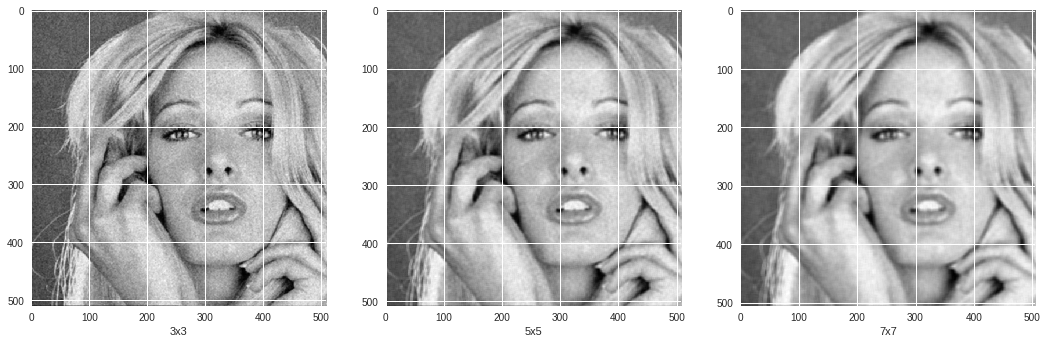


 ========================================= Gaussian Filter =========================================


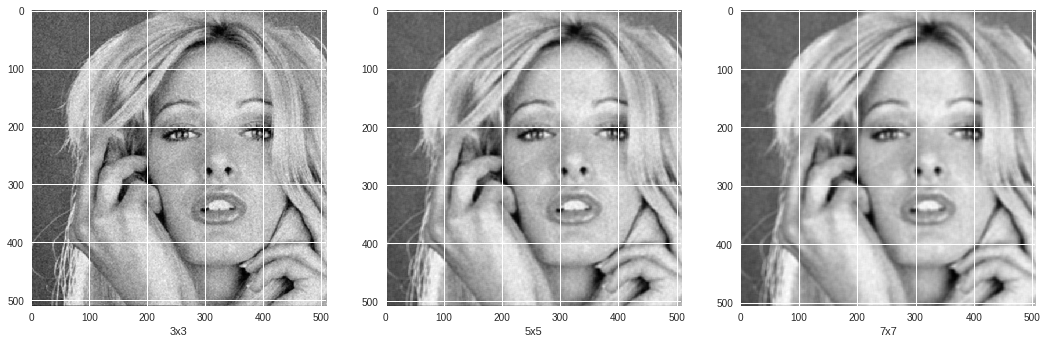

In [35]:
def conv(image, filter):
    iw,ih,id = image.shape
    
    fw,fh = filter.shape    
    out = np.zeros((iw-fw+1,ih-fh+1,id))
    
    for d in range(id):
        for w in range(ih-fh+1):
            for h in range(iw-fw+1):
                out[w,h,d] = np.sum(filter*image[w:w+fh , h:h+fw , d])
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

    


fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= Low Pass Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    (lpfw,lpfh) = (i,i)
    lowPassFilter = np.ones((lpfw,lpfh))*1/(lpfw*lpfh)
    low_image = conv(img, lowPassFilter)
    imshow(low_image)
    cv2.imwrite("low"+str(i)+"x"+str(i)+".jpg",low_image)    
plt.show()

print()
fig = plt.figure(2, figsize=(18, 16))
print(" ========================================= Gaussian Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    (gfw,gfh) = (i,i)
    gaussianFilter = gaussFilter((gfw,gfh),4)
    gaussian_image = conv(img, gaussianFilter)
    imshow(gaussian_image)
    cv2.imwrite("gaussian"+str(i)+"x"+str(i)+".jpg",gaussian_image)
plt.show()
    

## Bilateral Filter and its example

### bfunc:

Function that create Bilateral Filter according to image portion and give pixel value after applying it to image part

*Parameters*: 

- **i,j**: pixel value for which bilateral filter will be applied
- **fw,fh**: Filter width and filter height
- **image**: input image on which pixel (i,j) exist
-  **sigma1, sigma2**:  bilateral function parameters
- **bilaterealWFilter**: weighted bilateral Filteral


### bilateralFilterConv:

Function that apply convolution on given image with the bilateral filter of given size

*Parameters*:

- **image**: input image on which bilateral filter will be applied
- **fw,fh**: widht and height if bilateral filter

*Return*:

- returns a bilateral filtered image (2d/3d matrix)



 ========================================= Bilateral Filter =========================================


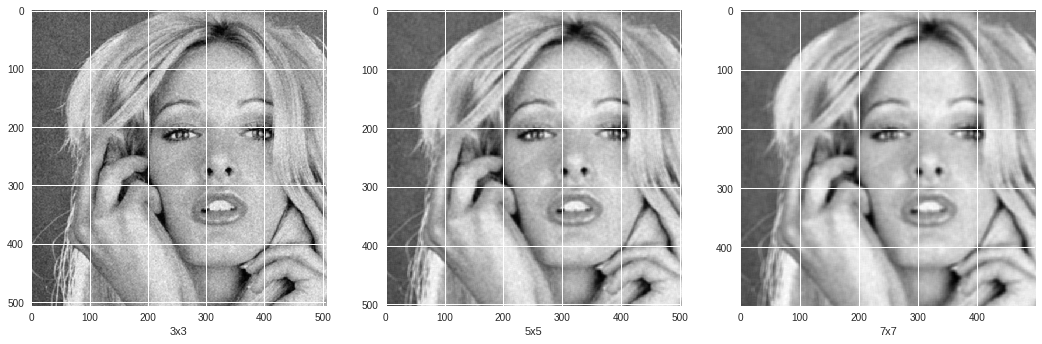

In [36]:
# bilateral filter

def bfunc(i,j,fw,fh,image,sigma1, sigma2, bilateralWFilter):
    imgwork = image[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    
    bilateralIFilter = ((imgwork - image[i, j,:])**2 )/(2*(sigma1**2))
    
    bilateralFilter = np.exp(-1*bilateralIFilter)*bilateralWFilter
    bilateralFilter = bilateralFilter/np.sum(bilateralFilter,axis=(0,1))
    return np.sum(np.multiply(imgwork, bilateralFilter),axis=(0,1))

def bilateralFilterConv(image, fw,fh):
    size = image.shape
    sigma1 = 40
    sigma2 = 40
    bilateral1 = 2*3.14*sigma2*sigma2*gaussFilter((fw,fh), sigma2)
    if len(image.shape) < 3  or image.shape[2] == 1:
        bilateralWFilter = np.resize(bilateral1,(*bilateral1.shape,1))
    else:
        bilateralWFilter = np.stack([bilateral1, bilateral1, bilateral1], axis=2)
    
    out = np.zeros((size[0]-2*fw +1,size[1]-2*fh +1,size[2]))
    for i in range(size[0]-2*fh +1):
        for j in range(size[1]-2*fw +1):
            out[i,j,:] = bfunc(i+fw-1, j+fh-1, fw, fh, image, sigma1, sigma2, bilateralWFilter)
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)


    
fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= Bilateral Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    bfw,bfh = (i,i)
    bilateral_image = bilateralFilterConv(img, bfw,bfh)
    imshow(bilateral_image)
    cv2.imwrite("bilateral"+str(i)+"x"+str(i)+".jpg",bilateral_image)    
plt.show()


## Non Local Mean Filter and its example

### nlmfunc:

Function that create Non Local Mean Filter according to image portion and give pixel value after applying it to image part.

*Parameters*: 

- **i,j**: pixel value for which NLM filter will be applied
- **fw,fh**: Filter width and filter height
- **nw,nh**: neighbour width and height
- **image**: input image on which pixel (i,j) exist
-  **sigma1, sigma2**:  bilateral function parameters
- **nlmWFilter**: bilateral Filteral


### nlmFilterConv:

Function that apply convolution on given image with the NLM filter of given size.

*Parameters*:

- **image**: input image on which NLM filter will be applied
- **nw,nh**: neighbour width and height
- **fw,fh**: widht and height if NLM filter

*Return*:

- returns a NLM filtered image (2d/3d matrix)





 ========================================= NLM Filter =========================================


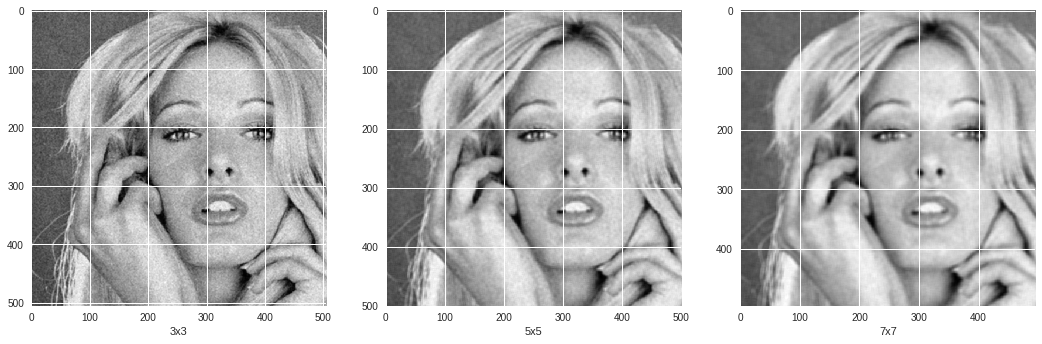

In [43]:
# Non Local Mean filter

def nlmfunc(i, j, fw, fh, nw, nh ,image,sigma1, sigma2, nlmWFilter):
    imgmain = image[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    
    nlmFilter = 0
    for p in range(-(nh//2), 1+(nh//2)):
        for q in range(-(nw//2), 1+(nw//2)):
            imgneighbour = image[i + p - fh//2: i+1+p + fh//2, j+q - fw//2:j+1+q + fw//2, :]
            nlmIFilter = ((imgmain - imgneighbour)**2 )/(2*(sigma1**2))
            nlmFilter += np.exp(-1*nlmIFilter)
            
    nlmFilter = nlmFilter/np.sum(nlmFilter,axis=(0,1))
    nlmFilter = nlmFilter*nlmWFilter
    nlmFilter = nlmFilter/np.sum(nlmFilter,axis=(0,1))
    return np.sum(np.multiply(imgmain, nlmFilter),axis=(0,1))

def nlmFilterConv(image, fw,fh, nw, nh):
    size = image.shape
    sigma1 = 20
    sigma2 = 20
    nlmWFilter1 = 2*3.14*sigma2*sigma2*gaussFilter((fw,fh), sigma2)
    if len(image.shape) < 3  or image.shape[2] == 1:
        nlmWFilter = np.resize(nlmWFilter1,(*nlmWFilter1.shape,1))
    else:
        nlmWFilter = np.stack([nlmWFilter1, nlmWFilter1, nlmWFilter1], axis=2)    

    out = np.zeros((size[0]-2*fw +1-nw//2,size[1]-2*fh +1-nh//2, size[2]))
    for i in range(nh//2, size[0]-2*fh +1-nh//2):
        for j in range(nw//2, size[1]-2*fw +1- nw//2):
            out[i,j,:] = nlmfunc(i+fw-1, j+fh-1, fw, fh, nw, nh, image, sigma1, sigma2, nlmWFilter)
        
    out[0:nh//2,:,:] = out[nh//2,:,:]
    out[:,0:nw//2,:] = out[:,nw//2,:,np.newaxis]
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

    
    
fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= NLM Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    nlmfw,nlmfh = (i,i)
    nlm_image = nlmFilterConv(img, nlmfw,nlmfh, i, i)
    imshow(nlm_image)
    cv2.imwrite("nlm"+str(i)+"x"+str(i)+".jpg",nlm_image)
plt.show()

## Comparing results of all filters

All Comparisons were done using "No Reference Image Quality Assessment".  **Non Local Mean** was found best among all filters. However, all filters give the good results and scores given by them are close to each others scores.




In [44]:
print("Original Image Score of the given image:  61.09182487181366")

print("========================== Low Pass Filter=======================")
print("3x3: Score of the given image:  17.65453329005433")
print("5x5: Score of the given image:  36.57977626774763")
print("7x7: Score of the given image:  43.03394739384518")
print("9x9: Score of the given image:  49.367030925596936")
print("11x11: Score of the given image:  57.75450589281954")

print("========================== Gaussian Filter=======================")
print("3x3: Score of the given image:  17.598815117503335")
print("5x5: Score of the given image:  40.17641998372548")
print("7x7: Score of the given image:  53.51036518030489")
print("9x9: Score of the given image:  62.92074436030131")
print("11x11: Score of the given image:  69.7025214296061")

print("========================== Bilateral Filter=======================")
print("3x3: Score of the given image:  16.584317547327117")
print("5x5: Score of the given image:  38.824409207202365")
print("7x7: Score of the given image:  44.1374802117526")
print("9x9: Score of the given image:  50.30464610594149")
print("11x11: Score of the given image:  56.92915541182239")

print("========================== Non Local Mean Filter=======================")
print("3x3: Score of the given image:  16.369365771703586")
print("5x5: Score of the given image:  36.408236332713244")
print("7x7: Score of the given image:  43.01151838326959")


Original Image Score of the given image:  61.09182487181366
========================== Low Pass Filter=======================
3x3: Score of the given image:  17.65453329005433
5x5: Score of the given image:  36.57977626774763
7x7: Score of the given image:  43.03394739384518
9x9: Score of the given image:  49.367030925596936
11x11: Score of the given image:  57.75450589281954
========================== Gaussian Filter=======================
3x3: Score of the given image:  17.598815117503335
5x5: Score of the given image:  40.17641998372548
7x7: Score of the given image:  53.51036518030489
9x9: Score of the given image:  62.92074436030131
11x11: Score of the given image:  69.7025214296061
========================== Bilateral Filter=======================
3x3: Score of the given image:  16.584317547327117
5x5: Score of the given image:  38.824409207202365
7x7: Score of the given image:  44.1374802117526
9x9: Score of the given image:  50.30464610594149
11x11: Score of the given image:  5

Garphs of Brisque Scores of Different Filters with there size


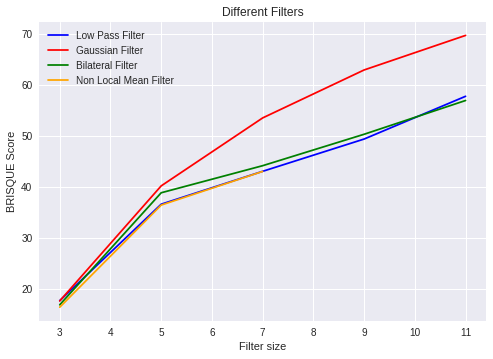

In [48]:
print("Garphs of Brisque Scores of Different Filters with there size")

x = [3,5,7,9,11]
y1 = [17.65453329005433, 36.57977626774763, 43.03394739384518, 49.367030925596936, 57.75450589281954]
y2 = [17.598815117503335, 40.17641998372548, 53.51036518030489, 62.92074436030131, 69.7025214296061]
y3 = [16.83974876871534, 38.824409207202365, 44.1374802117526, 50.30464610594149, 56.92915541182239]

x4 = [3, 5, 7]
y4 = [16.369365771703586, 36.408236332713244, 43.01151838326959]

plt.title("Different Filters")
plt.xlabel("Filter size")
plt.ylabel("BRISQUE Score")
plt.plot(x,y1, color="blue", label="Low Pass Filter")
plt.plot(x,y2, color="red", label="Gaussian Filter")
plt.plot(x,y3, color="green", label="Bilateral Filter")
plt.plot(x4,y4, color="orange", label="Non Local Mean Filter")
plt.legend(loc='upper left')


## References

- Brisque Scores was predicted using python repo which is implementation of paper "No Reference Image Quality Assessment in the Spatial Domain". "https://github.com/krshrimali/No-Reference-Image-Quality-Assessment-using-BRISQUE-Model"